Aquí están las ecuaciones que has proporcionado:

1. La ecuación original es:

    $$ P = G \times \eta \times (1 - \alpha \times T - \beta \times N) $$

    Donde:
    * \( P \) es la potencia generada.
    * \( G \) es la radiación solar incidente.
    * \( \eta \) es la eficiencia del panel solar.
    * \( T \) es la temperatura del panel.
    * \( N \) es un parámetro que representa la nubosidad.
    * \( \alpha \) y \( \beta \) son coeficientes que representan la sensibilidad de la potencia generada a la temperatura y a la nubosidad, respectivamente.

2. Los coeficientes \( \alpha \) y \( \beta \) pueden ser determinados empíricamente mediante pruebas de laboratorio y análisis de datos de rendimiento del panel solar en diferentes condiciones ambientales. También pueden ser ajustados utilizando métodos de optimización para mejorar la precisión del modelo.

Estas ecuaciones te permitirán modelar la potencia generada por un panel solar en función de la radiación solar incidente, la temperatura del panel y la nubosidad. 

Tus ecuaciones están correctamente escritas y tu enfoque para linealizar la ecuación original es correcto. Aquí están las ecuaciones que has proporcionado:

1. La ecuación original es:

    $$ P = G \times \eta \times (1 - \alpha \times T - \beta \times N) $$

2. Tomamos el logaritmo natural de ambos lados para obtener una forma lineal:

    $$ \ln(P) = \ln(G \times \eta \times (1 - \alpha \times T - \beta \times N)) $$

3. Simplificamos la ecuación:

    $$ \ln(P) = \ln(G) + \ln(\eta) + \ln(1 - \alpha \times T - \beta \times N) $$

4. Definimos dos nuevas variables, \( X \) y \( Y \):

    $$ X = \ln(1 - \alpha \times T) $$
    $$ Y = \ln(1 - \beta \times N) $$

5. Sustituimos \( X \) y \( Y \) en la ecuación:

    $$ \ln(P) = \ln(G) + \ln(\eta) + X + Y $$

6. Finalmente, obtenemos los valores de \( \alpha \) y \( \beta \) a partir de los coeficientes obtenidos en el modelo de regresión lineal:

    $$ \alpha = -\frac{1}{T} \times (e^X - 1) $$
    $$ \beta = -\frac{1}{N} \times (e^Y - 1) $$

Estas ecuaciones te permitirán calcular \( \alpha \) y \( \beta \) a partir de los coeficientes obtenidos en el modelo de regresión lineal. 



## Potencia generada por el inversor 

/var/folders/pz/w3bcsy5x2wgb_7c0fs6qmkp80000gn/T/ipykernel_14340/3377340962.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SFV['Potencia'] = df_SFV['Producción fotovoltaica'] / (5/60)


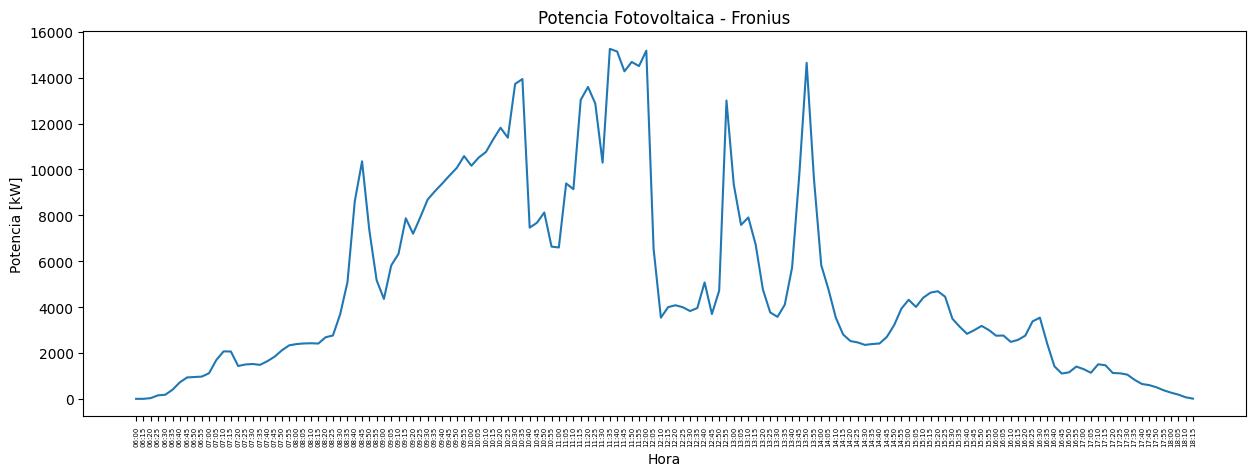

In [37]:
import numpy as np            # manejo arreglos
import pandas as pd           # manipulación dataframes      
import matplotlib.pyplot as plt    # Realiza graficas
import pytz                        # manipulación de zonas horarias                     
from datetime import datetime, date, timedelta  # manipulacion de fechas y horas


# leer el archivo csv en la ruta Data/Processed/SFV_01-01-2023.csv
df = pd.read_csv('../../Data/Processed/SFV_01-01-2023.csv')

# nuevo dataframe con las columnas de hora y producción fotovoltaica
df_SFV = df[['Hora', 'Producción fotovoltaica']]
df_SFV['Potencia'] = df_SFV['Producción fotovoltaica'] / (5/60)

# valores de 'Potencia' diferentes de cero
df_SFV = df_SFV[df_SFV['Potencia'] != 0]

# graficar la potencia fotovoltaica
plt.figure(figsize=(15, 5))
plt.plot(df_SFV['Hora'], df_SFV['Potencia'])
plt.title('Potencia Fotovoltaica - Fronius')
plt.xlabel('Hora')
plt.ylabel('Potencia [kW]')
plt.xticks(rotation=90, size=5)
plt.show()



## ⚽ 😃

In [4]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# Leer el archivo csv 'solargis_01-01-2023.csv '
df = pd.read_csv('../../Data/Processed/solargis_01-01-2023.csv', sep=',')
# Eliminar el primer carácter de 'Time'
df['Time'] = df['Time'].str.slice(1)

df.head()
# print(df.shape)

,Date,GHI,DNI,DHI,TEMP,WS,WD,flagR,SE,SA,RH,AP,PWAT,WG,PREC,Time
0,01.01.2023,0,0,0,11.7,1.1,342,0,-12.57,66.71,94.9,749.1,20.4,3.4,0.1,19:05
1,01.01.2023,0,0,0,11.5,1.1,344,0,-14.86,66.52,95.3,749.2,20.3,3.4,0.1,19:15
2,01.01.2023,0,0,0,11.3,1.0,346,0,-17.15,66.29,95.6,749.3,20.3,3.4,0.1,19:25
3,01.01.2023,0,0,0,11.2,1.0,348,0,-19.44,66.01,95.9,749.4,20.3,2.9,0.0,19:35
4,01.01.2023,0,0,0,11.0,1.0,350,0,-21.72,65.68,96.3,749.5,20.3,2.9,0.0,19:45


## Time matching between DB

In [44]:
# Crear un nuevo DataFrame vacío
new_df = pd.DataFrame()

# Iterar sobre cada valor en 'Time'
for time in df['Time']:
    # Buscar el valor en 'Hora' y guardar las filas correspondientes en el nuevo DataFrame
    matching_rows = df_SFV[df_SFV['Hora'] == time]
    new_df = pd.concat([new_df, matching_rows])

print(new_df)

      Hora  Producción fotovoltaica  Potencia
75   06:15                     0.03      0.36
77   06:25                    12.79    153.48
79   06:35                    33.26    399.12
81   06:45                    77.83    933.96
83   06:55                    80.84    970.08
..     ...                      ...       ...
211  17:35                    69.00    828.00
213  17:45                    49.89    598.68
215  17:55                    31.00    372.00
217  18:05                    15.35    184.20
219  18:15                     0.77      9.24

[73 rows x 3 columns]


## Encontrar los coeficientes α y β

## 😎

In [45]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Cargar el dataframe con los datos
# Supongamos que tu dataframe se llama df y tiene las columnas 'GHI', 'Temperatura' y 'Nubosidad'
# Además, la eficiencia del panel solar se define como 0.2094 (20.94%)
# Puedes cargar tus datos desde un archivo CSV o desde cualquier otra fuente
# Por ejemplo, si los datos están en un archivo CSV llamado 'datos.csv':
# df = pd.read_csv('datos.csv')

# Filtrar filas con valores no válidos de la potencia generada
df = df[df['GHI'] > 0]

# print(df.head())
# #grafica de GHI en el tiempo
# plt.plot(df['Time'], df['GHI'])
# plt.title('GHI')
# plt.xlabel('Hora')
# plt.ylabel('GHI (Wh/m2)')
# plt.show()




# Definir variables dependiente e independientes
efficiency = 0.2094  # Eficiencia del panel solar
catidad_pv= 30
area =2.274*1.134

X = df[['TEMP', 'flagR']]
y = np.log(df['GHI'])  # Convertir la potencia generada a escala logarítmica
# y = np.log(df['GHI']  * efficiency * area * catidad_pv)  # Convertir la potencia generada a escala logarítmica

# # graficar y
# plt.plot(df['Time'], y)
# plt.title('GHI')
# plt.xlabel('Hora')
# plt.ylabel('GHI (Wh/m2)')
# plt.show()





# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# #graficar la regresion
# plt.plot(df['Time'], model.predict(X))
# plt.title('GHI')
# plt.xlabel('Hora')
# plt.ylabel('GHI (Wh/m2)')
# plt.show()






# # Obtener los coeficientes de la regresión
alpha = -model.coef_[0] / np.mean(df['TEMP'])
beta = -model.coef_[1] / np.mean(df['flagR'])

print("Coeficiente alpha:", alpha)
print("Coeficiente beta:", beta)


Coeficiente alpha: -0.004736674951098967
Coeficiente beta: 1.1173030320387383


## Potencia calculada 


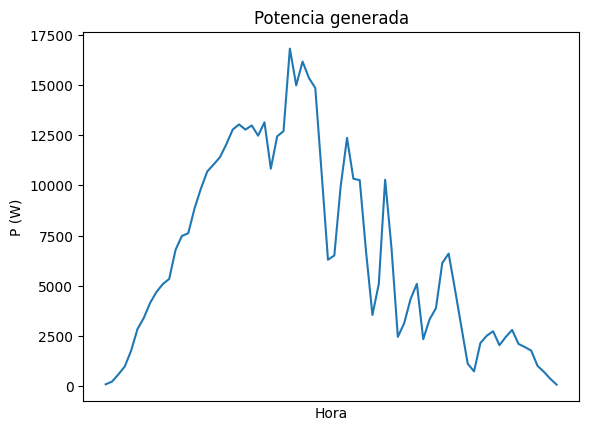

In [78]:
#    $$ P = G \times \eta \times (1 - \alpha \times T - \beta \times N) $$
# Donde: G es GHI 
#        T es TEMP
#        N es flagR
#        $\eta$ es la eficiencia del panel solar
#        $\alpha$ es alpha
#        $\beta$ es beta
#        P es la potencia generada

# Calcular la potencia generada
# df['P'] = df['GHI'] * efficiency * (1 - alpha * df['TEMP'] - beta * df['flagR'])
# df['P'] = df['GHI'] * efficiency *  area * catidad_pv * (1 - alpha * df['TEMP'] - beta * df['flagR'])
df['P'] = df['GHI'] * efficiency *  area * catidad_pv 

df['P_'] = df['GHI'] * efficiency *  area * catidad_pv * (1 - alpha * df['TEMP'] - beta * df['flagR'])
df['P_2'] = df['GHI'] * efficiency *  area * catidad_pv * (1 - alpha * df['TEMP'])

# Imprimir la potencia generada
# print(df['P'])

# Graficar la potencia generada
# plt.plot(df['Time'], df['P'])
# plt.plot(df['Time'], df['P_'])
plt.plot(df['Time'], df['P_2'])
plt.title('Potencia generada')
plt.xlabel('Hora')
plt.ylabel('P (W)')
# valores en el eje x
plt.xticks([])
plt.show()

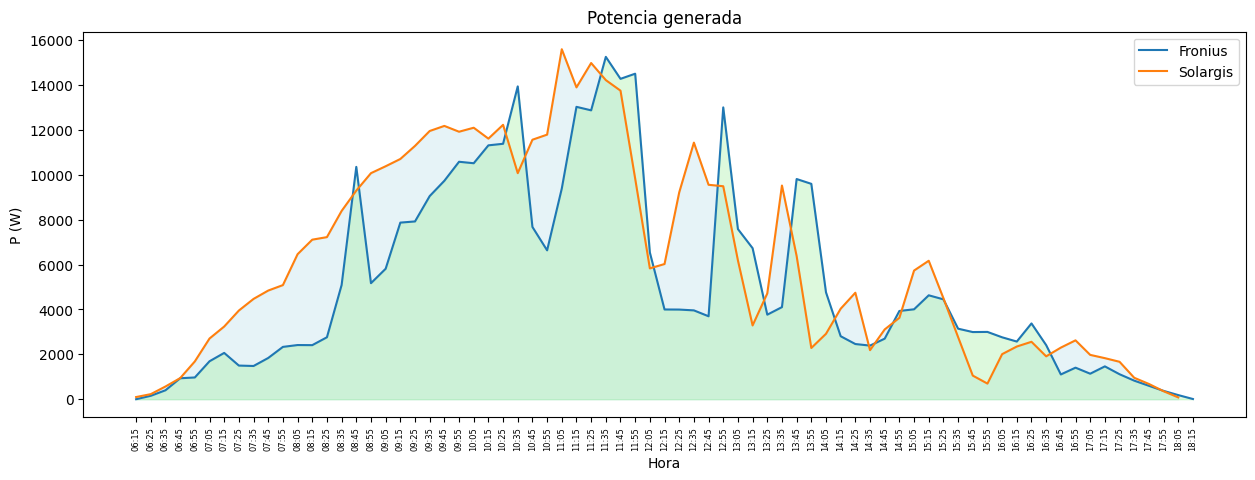

Area bajo la curva Fronius: 366074.32000000007
Area bajo la curva Solargis: 445473.932959566
Error porcentual: 17.823627172091513 %


In [81]:
# graficar new_df con la potencia 
#tamaño de la figura
plt.figure(figsize=(15, 5))
plt.plot(new_df['Hora'], new_df['Potencia'], label='Fronius')
# agregar df['Time'], df['P']
plt.plot(df['Time'], df['P'], label='Solargis')
# agregar df['Time'], df['P_2']
# plt.plot(df['Time'], df['P_2'], label='Solargis_2')

# grafica el area bajo la curva de potencia generada
plt.fill_between(df['Time'], df['P'], color='lightblue', alpha=0.3)
# grafica el area bajo la curva de potencia generada
plt.fill_between(new_df['Hora'],  new_df['Potencia'], color='lightgreen', alpha=0.3)

plt.title('Potencia generada')
plt.xlabel('Hora')
plt.ylabel('P (W)') 
plt.xticks(rotation=90, size=6)
plt.legend()
plt.show()


#Calcular el área bajo la curva mediante integración numérica
from scipy.integrate import simps
area_fronius = simps(new_df['Potencia'], dx=1)
area_solargis = simps(df['P'], dx=1)
print('Area bajo la curva Fronius:', area_fronius)
print('Area bajo la curva Solargis:', area_solargis)

# calula el error porcentual
error = abs(area_fronius - area_solargis) / area_solargis * 100
print('Error porcentual:', error, '%')



